# LAB-CUSTOMER ANALYSIS

## Lab | Customer Analysis Round 2


For this lab, we will be using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder. Check out the files_for_lab/about.md to get more information if you are using the Online Excel.

Note: For the next labs we will be using the same data file. Please save the code, so that you can re-use it later in the labs following this lab.

1. Dealing with the data
2. Show the dataframe shape.
3. Standardize header names.
4. Which columns are numerical?
5. Which columns are categorical?
6. Check and deal with NaN values.
7. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
8. BONUS: Put all the previously mentioned data transformations into a function.

In [3127]:
import pandas as pd
import numpy as np

#### 1. IMPORTING FILE & DEALING WITH DATA

In [3128]:
mca_file = pd.read_csv('./csv_files/marketing_customer_analysis.csv')
mca_file.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [3129]:
# Deleting original column 'Unnamed: 0' of de DF
mca_file = mca_file.drop (['Unnamed: 0'], axis=1)

# Checking
mca_file.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

In [3130]:
mca_file.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


#### 2. SHOW THE DATAFRAME SHAPE

In [3131]:
mca_file.shape

(10910, 25)

#### 3. STANDARDIZE HEADER NAMES

In [3132]:
# Getting columns names
columns_names = mca_file.columns

# Converting all column's name to lowercase 
cols = []
for c in columns_names:
    cols.append(c.lower())
cols

mca_file.columns = cols

#checking
mca_file.columns


Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

#### 4-5. WHICH COLUMNS ARE NUMERICAL? AND WHICH CATEGORICAL?

In [3133]:
# Checking data types 
display(mca_file.dtypes)

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
vehicle type    

In [3134]:
#Checking for categorical types
categorical_columns = mca_file.select_dtypes(include=['object'])

print("Categorical Columns are: ")
display(categorical_columns.dtypes)


#Checking for categorical types
numerical_columns = mca_file.select_dtypes(include=['float64','int64'])

print("Numerical Columns are: ")
display(numerical_columns.dtypes)



Categorical Columns are: 


customer             object
state                object
response             object
coverage             object
education            object
effective to date    object
employmentstatus     object
gender               object
location code        object
marital status       object
policy type          object
policy               object
renew offer type     object
sales channel        object
vehicle class        object
vehicle size         object
vehicle type         object
dtype: object

Numerical Columns are: 


customer lifetime value          float64
income                             int64
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
total claim amount               float64
dtype: object

#### 6. Check and deal with NaN values.

In [3135]:
null_values = mca_file.isnull()

print("Columns with Nan Values:")
print()
print(null_values.sum())


Columns with Nan Values:

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64


In [3136]:
# Removing null values

mca_file = mca_file.dropna()

null_values2=mca_file.isnull()

print("Checking no remaining Nan Values:")
print()
print(null_values2.sum())

Checking no remaining Nan Values:

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
vehicle type                     0
dtype: int64


#### 7. Datetime format - Extract the months from the dataset and store in a separate column.
##### Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.


In [3137]:
#extracting months
mca_file['months'] = pd.DatetimeIndex(mca_file['effective to date']).month
mca_file.head()

#checking unique values in column 'Months'
mca_file['months'].unique()


array([2, 1])

In [3138]:
# Assigning names to months
mca_file['months'] = mca_file['months'].replace({1:'January', 2:'February'})

#Checking
mca_file['months'].unique()


array(['February', 'January'], dtype=object)

In [3139]:
# Deleting original column 'effective to date' of de DF
mca_file = mca_file.drop (['effective to date'], axis=1)

# Checking
mca_file.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'employmentstatus', 'gender', 'income', 'location code',
       'marital status', 'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'total claim amount', 'vehicle class', 'vehicle size',
       'vehicle type', 'months'],
      dtype='object')

#### 8. BONUS: Put all the previously mentioned data transformations into a function.

## Lab | Customer Analysis Round 3

For this lab, we still keep using the marketing_customer_analysis.csv file. You can find the file in the files_for_lab folder.

#### Get the data
Use the same jupyter file from the last lab, Customer Analysis Round 3

##### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
1. Show DataFrame info.
2. Describe DataFrame.
3. Show a plot of the total number of responses.
4. Show a plot of the response rate by the sales channel.
5. Show a plot of the response rate by the total claim amount.
6. Show a plot of the response rate by income.


In [3140]:
display(mca_file.head())

,customer,state,customer lifetime value,response,coverage,education,employmentstatus,gender,income,location code,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,months
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,Employed,M,82730,Urban,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,January
13,KR82385,California,5454.587929,No,Basic,Master,Employed,M,66334,Suburban,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,January
16,FH51383,California,5326.677654,No,Basic,High School or Below,Employed,F,76717,Urban,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,February


### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:



In [3141]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 1 Show DataFrame info.

In [3142]:
mca_file.shape

(4543, 25)

#### 2 Describe DataFrame.

In [3143]:
mca_file.describe().T

/Users/albertlleidaestival/opt/anaconda3/lib/python3.9/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,count,mean,std,min,25%,50%,75%,max
customer lifetime value,4543.0,8033.714059,6959.529443,1904.000852,4039.089902,5846.520588,8936.596938,83325.381190
income,4543.0,37453.033238,30257.399536,0.000000,0.000000,34455.000000,61560.000000,99961.000000
monthly premium auto,4543.0,93.773278,35.093661,61.000000,69.000000,83.000000,110.000000,298.000000
months since last claim,4543.0,15.111820,10.157925,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,4543.0,48.153863,28.146904,0.000000,24.000000,47.000000,72.000000,99.000000
number of open complaints,4543.0,0.386309,0.907553,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,4543.0,2.980189,2.390362,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,4543.0,436.477525,295.026990,0.099007,265.686145,384.000000,552.000000,2893.239678


#### 3 Show a plot of the total number of responses.

<AxesSubplot:>

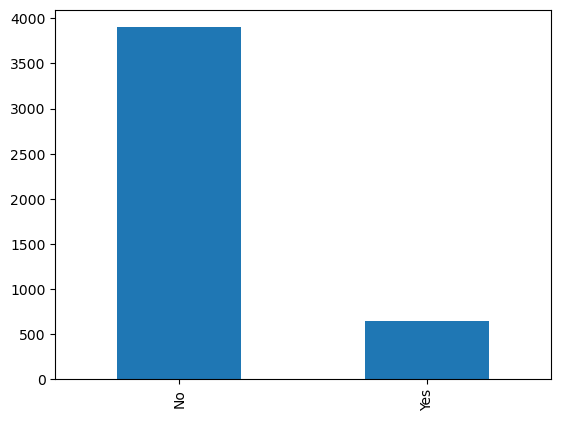

In [3144]:
mca_file['response'].value_counts().plot(kind='bar')

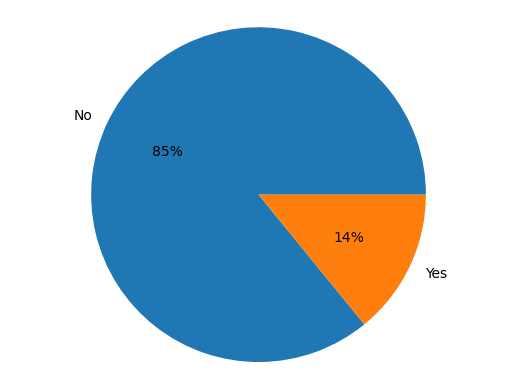

In [3145]:
# Checking % of responses ('Yes' or 'No')
val_count_resp = mca_file['response'].value_counts()
categ_responses = mca_file['response'].unique()

plt.pie(val_count_resp, labels=categ_responses, autopct='%d%%')
plt.axis('equal')
plt.show()

#### 4 Show a plot of the response rate by the sales channel.


In [3146]:
#Generating 'response rate' column and value
mca_file['response rate'] = np.where(mca_file['response'] == "Yes", 1, 0)

#checking
mca_file['response rate'].unique()

array([0, 1])

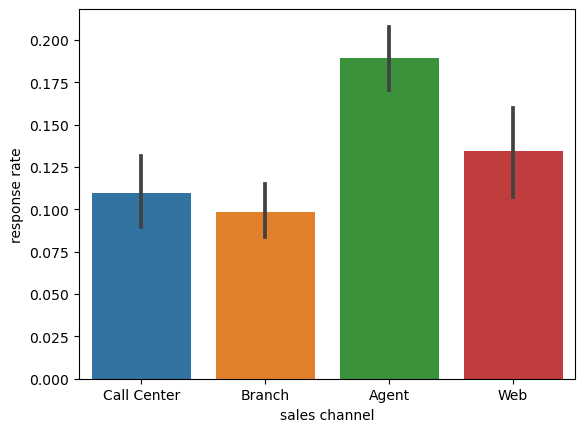

In [3147]:
#Plotting

sns.barplot(x ="sales channel",y = "response rate", data = mca_file)
plt.show()

In [3148]:
mca_file.head(3)

,customer,state,customer lifetime value,response,coverage,education,employmentstatus,gender,income,location code,...,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,months,response rate
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February,0
3,XL78013,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January,1
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,Employed,M,82730,Urban,...,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,January,0


#### 6. Show a plot of the response rate by the total claim amount.

In [3149]:
# Getting information in order to establish bins.
mca_file['total claim amount'].describe()

count    4543.000000
mean      436.477525
std       295.026990
min         0.099007
25%       265.686145
50%       384.000000
75%       552.000000
max      2893.239678
Name: total claim amount, dtype: float64

<AxesSubplot:ylabel='Frequency'>

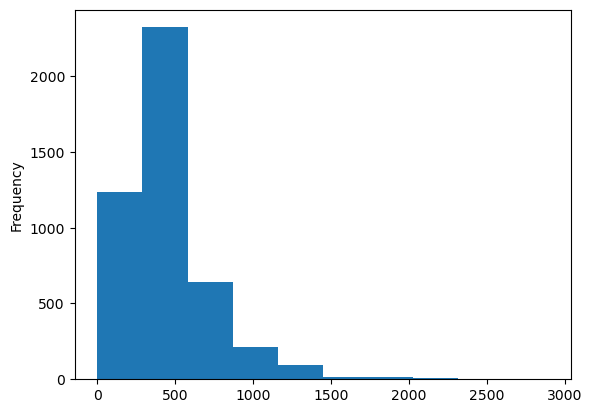

In [3150]:
# Getting data distribution
mca_file['total claim amount'].plot(kind='hist')

In [3151]:
# Division names 
claim_divisions = ['0-250', '250-500','500-750','750-1000','>1000']

# Creating group division
g1 = pd.cut(mca_file['total claim amount'], labels = claim_divisions, bins=[0,250,500,750,1000,3000])

# Creating new column in dataframe
mca_file['total claim range'] = g1

display(mca_file[['total claim amount', 'total claim range']].head(10))

,total claim amount,total claim range
2,480.000000,250-500
3,484.013411,250-500
10,442.521087,250-500
13,331.200000,250-500
16,300.528579,250-500
17,272.381465,250-500
18,350.400000,250-500
19,19.575683,0-250
20,499.200000,250-500
22,907.200000,750-1000


In [3152]:
mca_file['total claim range'].describe()

count        4543
unique          5
top       250-500
freq         1988
Name: total claim range, dtype: object

In [3153]:
# Counting for groups 
display(g1.value_counts())

250-500     1988
0-250       1072
500-750      955
750-1000     323
>1000        205
Name: total claim amount, dtype: int64

<AxesSubplot:xlabel='total claim range', ylabel='response rate'>

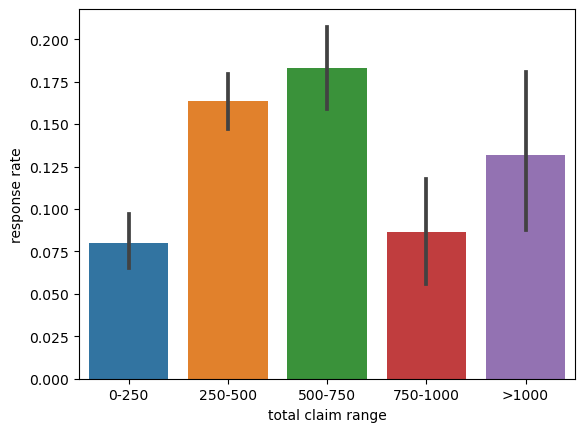

In [3154]:
sns.barplot(x='total claim range', y = 'response rate', data = mca_file) #didn't work as expected

#### 7 Show a plot of the response rate by income.

In [3155]:
# Getting information in order to establish bins.
mca_file['income'].describe()

count     4543.000000
mean     37453.033238
std      30257.399536
min          0.000000
25%          0.000000
50%      34455.000000
75%      61560.000000
max      99961.000000
Name: income, dtype: float64

<AxesSubplot:ylabel='Frequency'>

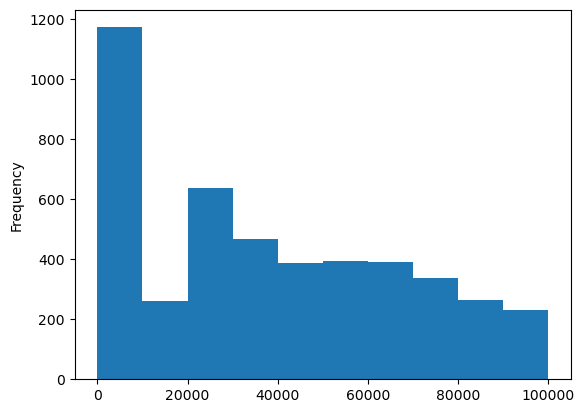

In [3156]:
# Getting data distribution
mca_file['income'].plot(kind='hist')

In [3157]:
# Division names 
income_divisions = ['0-20000', '20000-40000','60000-80000','>80000']

# Creating group division
g2 = pd.cut(mca_file['income'], labels = income_divisions, bins=4)

# Creating new column in dataframe
mca_file['income range'] = g2

display(mca_file[['income', 'income range']].head(10)) #

,income,income range
2,22139,0-20000
3,49078,20000-40000
10,82730,>80000
13,66334,60000-80000
16,76717,>80000
17,0,0-20000
18,17533,0-20000
19,41479,20000-40000
20,0,0-20000
22,59456,60000-80000


In [3158]:
# Counting for groups 
display(g2.value_counts())

0-20000        1748
20000-40000    1179
60000-80000     961
>80000          655
Name: income, dtype: int64

<AxesSubplot:xlabel='income range', ylabel='response rate'>

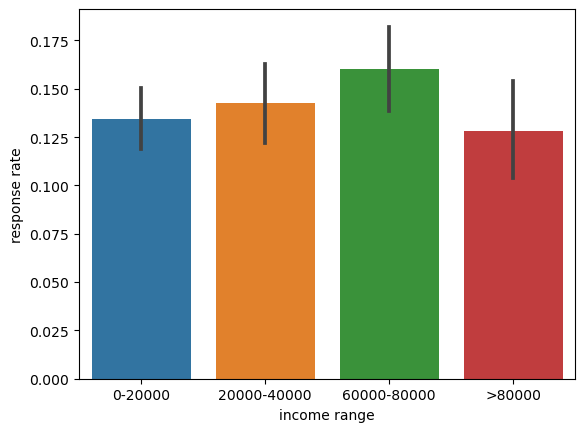

In [3159]:
sns.barplot(x='income range', y = 'response rate', data = mca_file)

## Lab | Customer Analysis Round 4

### Get the data
Use the jupyter file from the last lab (Customer Analysis Round 3)

### Complete the following task

1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
2. Now we will try to check the normality of the numerical variables visually
3. Use seaborn library to construct distribution plots for the numerical variables
    
    3.1. Use Matplotlib to construct histograms
    
    3.2. Do the distributions for different numerical variables look like a normal distribution


4. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
    
    4.1 Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features


#### 1.Check the data types of the columns.

In [3160]:
# Showing data types of each column
mca_file.dtypes


customer                           object
state                              object
customer lifetime value           float64
response                           object
coverage                           object
education                          object
employmentstatus                   object
gender                             object
income                              int64
location code                      object
marital status                     object
monthly premium auto                int64
months since last claim           float64
months since policy inception       int64
number of open complaints         float64
number of policies                  int64
policy type                        object
policy                             object
renew offer type                   object
sales channel                      object
total claim amount                float64
vehicle class                      object
vehicle size                       object
vehicle type                      

##### 1.1 Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [3161]:
#Getting numerical data types
numerical = mca_file.select_dtypes(include = np.number)
numerical.columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'total claim amount',
       'response rate'],
      dtype='object')

In [3162]:
# Getting categorical objects
categorical = mca_file.select_dtypes(include = 'object') #red warning --> using 'object' instead of np.object
categorical.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location code', 'marital status',
       'policy type', 'policy', 'renew offer type', 'sales channel',
       'vehicle class', 'vehicle size', 'vehicle type', 'months'],
      dtype='object')

#### 2.Now we will try to check the normality of the numerical variables visually

##### 2.1.Use seaborn library to construct distribution plots for the numerical variables
##### 2.2. Use Matplotlib to construct histograms
##### 2.3. Do the distributions for different numerical variables look like a normal distribution


In [3163]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,4543.0,8033.714059,6959.529443,1904.000852,4039.089902,5846.520588,8936.596938,83325.381190
income,4543.0,37453.033238,30257.399536,0.000000,0.000000,34455.000000,61560.000000,99961.000000
monthly premium auto,4543.0,93.773278,35.093661,61.000000,69.000000,83.000000,110.000000,298.000000
months since last claim,4543.0,15.111820,10.157925,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,4543.0,48.153863,28.146904,0.000000,24.000000,47.000000,72.000000,99.000000
number of open complaints,4543.0,0.386309,0.907553,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,4543.0,2.980189,2.390362,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,4543.0,436.477525,295.026990,0.099007,265.686145,384.000000,552.000000,2893.239678
response rate,4543.0,0.141096,0.348159,0.000000,0.000000,0.000000,0.000000,1.000000


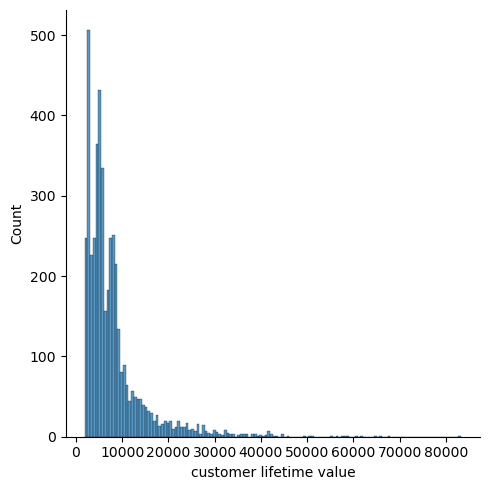

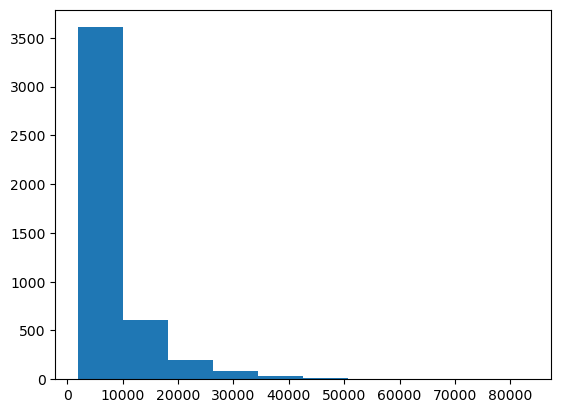

In [3164]:
sns.displot(numerical['customer lifetime value'])
plt.show()

plt.hist(numerical['customer lifetime value'])
plt.show()


'Customer lifetime value' data is not normally distributed, as it's skewed to the right.

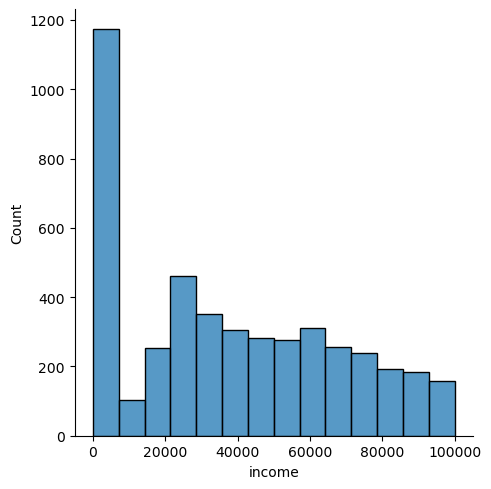

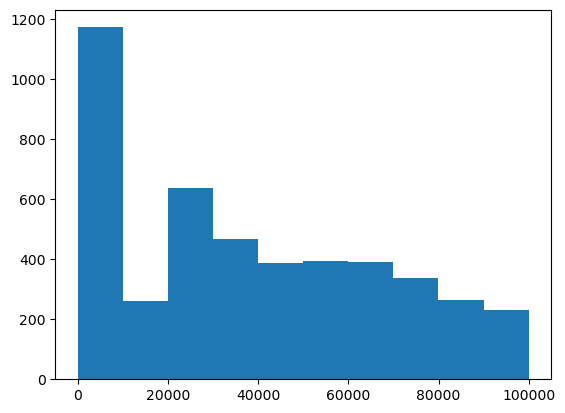

In [3165]:
sns.displot(numerical['income'])
plt.show()

plt.hist(numerical['income'])
plt.show()

'Income' data is not normally distributed

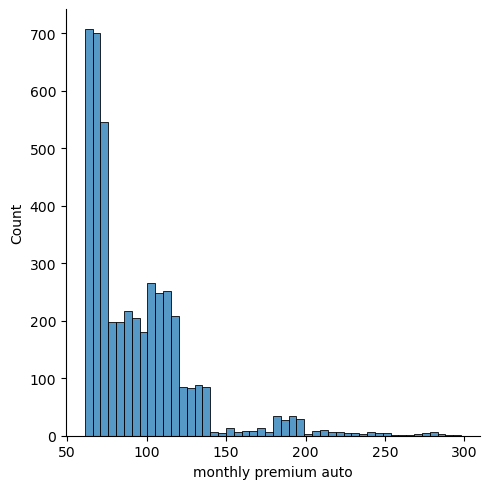

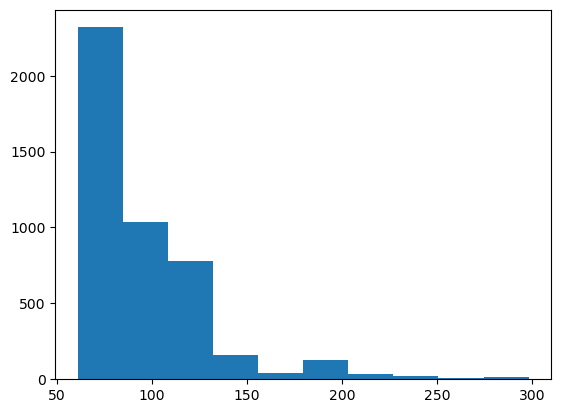

In [3166]:
sns.displot(numerical['monthly premium auto'])
plt.show()

plt.hist(numerical['monthly premium auto'])
plt.show()

'Months premium auto' data is not normally distributed.

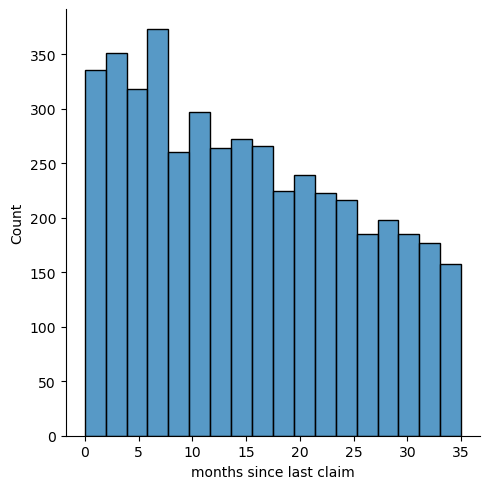

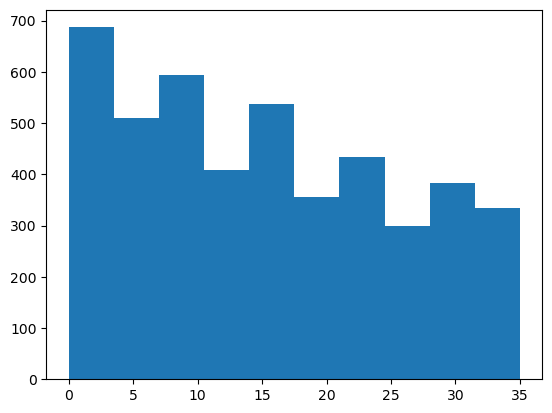

In [3167]:
sns.displot(numerical['months since last claim'])
plt.show()

plt.hist(numerical['months since last claim'])
plt.show()


'Months since last claim' data is not normally distributed.

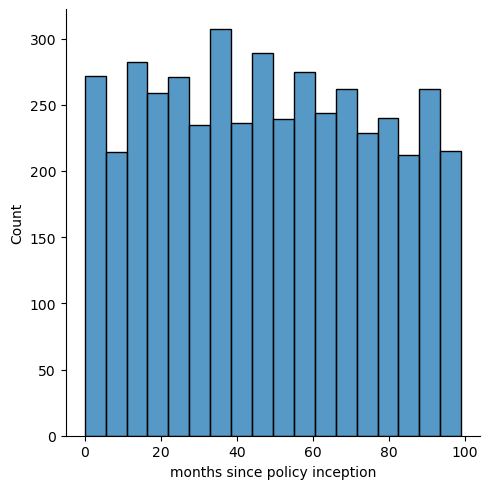

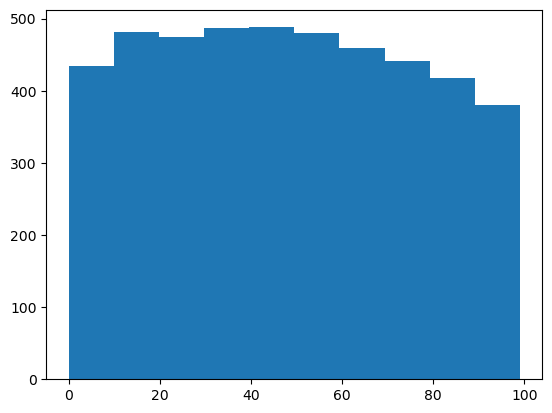

In [3168]:
sns.displot(numerical['months since policy inception'])
plt.show()

plt.hist(numerical['months since policy inception'])
plt.show()


'Months since policy inception' data is not normally distributed

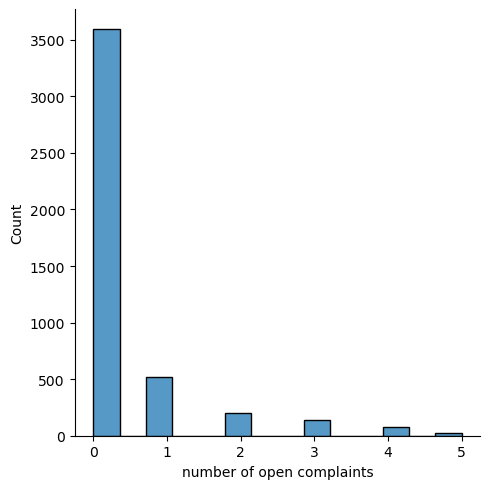

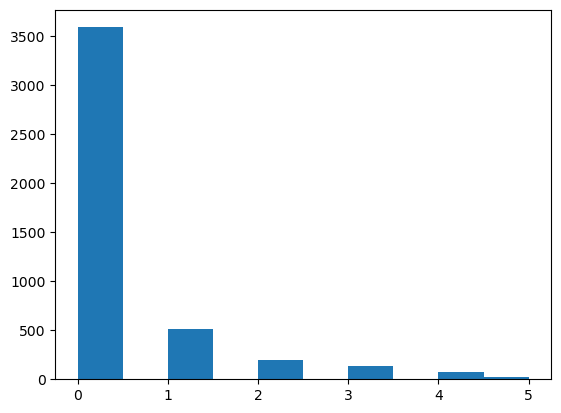

In [3169]:
sns.displot(numerical['number of open complaints'])
plt.show()

plt.hist(numerical['number of open complaints'])
plt.show()


'Number of open complaints' data is not normally distributed

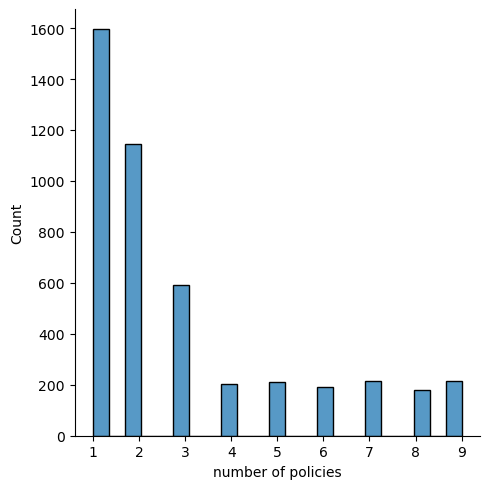

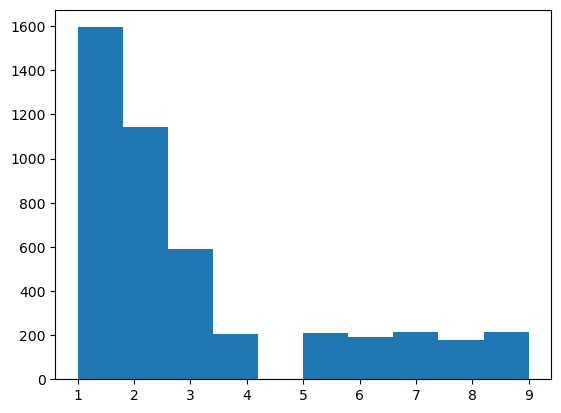

In [3170]:
sns.displot(numerical['number of policies'])
plt.show()

plt.hist(numerical['number of policies'])
plt.show()


'Number of policies' is not normally distributed.

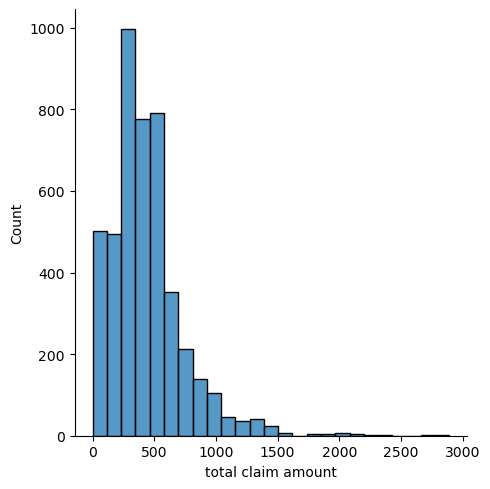

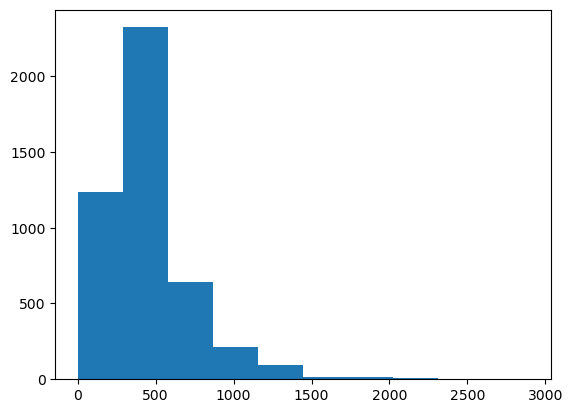

In [3171]:
sns.displot(numerical['total claim amount'], bins = 25)
plt.show()

plt.hist(numerical['total claim amount'])
plt.show()


'Total claim amount' data is not normally distributed.

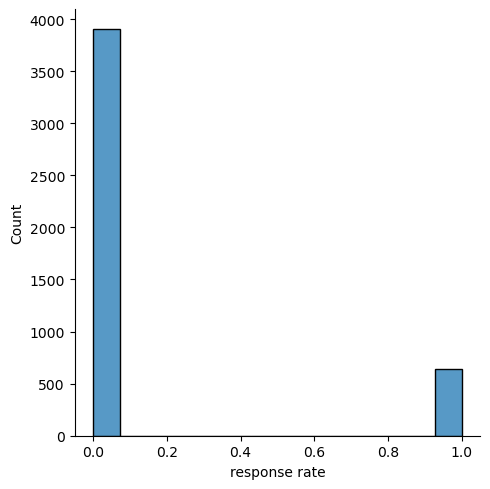

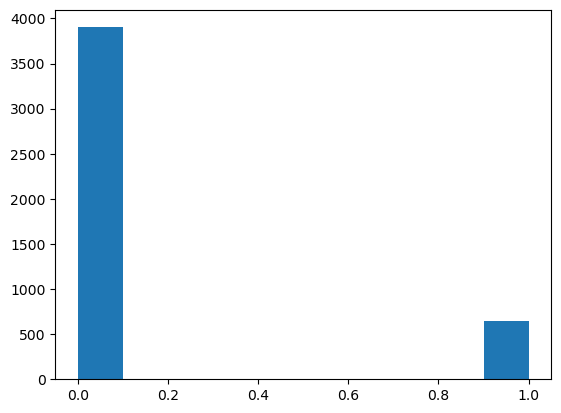

In [3172]:
sns.displot(numerical['response rate'])
plt.show()

plt.hist(numerical['response rate'])
plt.show()


'Response rate' data is not normally distributed.

#### 4. For the numerical variables, check the multicollinearity between the features.

##### Write code for both the correlation matrix and for seaborn heatmap.
Drop one of the two features that show a high correlation between them (greater than 0.9).  If there is no pair of features that have a high correlation, then do not drop any features.

Please note that we will use the column total_claim_amount later as the target variable.

In [3173]:
numerical.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,response rate
count,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000
mean,8033.714059,37453.033238,93.773278,15.111820,48.153863,0.386309,2.980189,436.477525,0.141096
std,6959.529443,30257.399536,35.093661,10.157925,28.146904,0.907553,2.390362,295.026990,0.348159
min,1904.000852,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,4039.089902,0.000000,69.000000,6.000000,24.000000,0.000000,1.000000,265.686145,0.000000
50%,5846.520588,34455.000000,83.000000,14.000000,47.000000,0.000000,2.000000,384.000000,0.000000
75%,8936.596938,61560.000000,110.000000,23.000000,72.000000,0.000000,4.000000,552.000000,0.000000
max,83325.381190,99961.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [3174]:
# Generating a correlation matrix for NUMERICAL MATRIX
correlations_matrix = numerical.corr()
correlations_matrix

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,response rate
customer lifetime value,1.000000,0.015914,0.413739,0.029199,0.022465,-0.034924,0.015397,0.228579,-0.018783
income,0.015914,1.000000,-0.007594,-0.010556,-0.007987,0.001149,-0.013199,-0.355311,0.019743
monthly premium auto,0.413739,-0.007594,1.000000,0.000890,0.033422,-0.002469,-0.025578,0.630894,0.013683
months since last claim,0.029199,-0.010556,0.000890,1.000000,-0.036879,-0.000364,0.001089,-0.011449,-0.013800
months since policy inception,0.022465,-0.007987,0.033422,-0.036879,1.000000,-0.001965,-0.009029,0.012610,-0.005092
number of open complaints,-0.034924,0.001149,-0.002469,-0.000364,-0.001965,1.000000,0.014388,-0.003433,-0.008796
number of policies,0.015397,-0.013199,-0.025578,0.001089,-0.009029,0.014388,1.000000,0.002864,-0.015159
total claim amount,0.228579,-0.355311,0.630894,-0.011449,0.012610,-0.003433,0.002864,1.000000,0.018033
response rate,-0.018783,0.019743,0.013683,-0.013800,-0.005092,-0.008796,-0.015159,0.018033,1.000000


<AxesSubplot:>

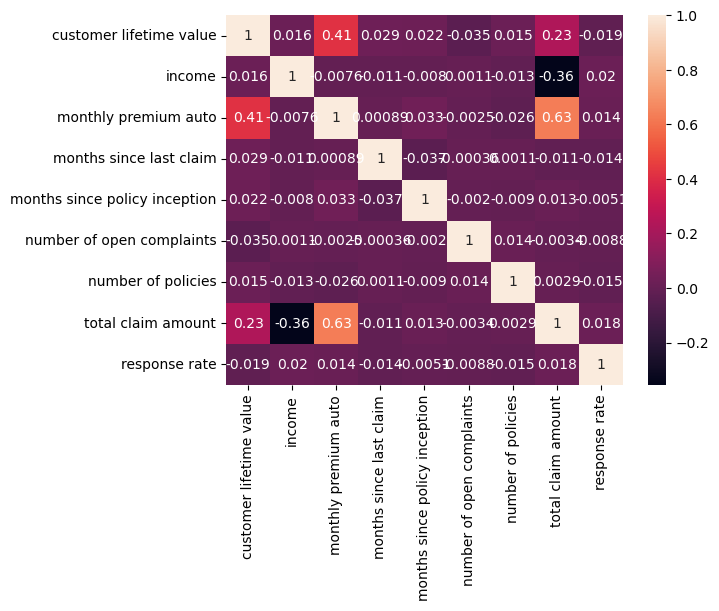

In [3175]:
# Plotting a heatmap
sns.heatmap(correlations_matrix, annot = True)

##### Correlations:
As most values are close to 0, most features are vaguely correlated (both negative and positive correlation).

Highest correlation found in this heatmap is 0.63 between 'Total Claim amount' & 'Monthly Premium Auto'.

## Lab | Customer Analysis Round 5

#### For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

#### Processing Data (Further processing...)

1. X-y split. (target = 'total claim amount)
2.  Normalize (numerical).

#### 1. X-y split. --> TARGET: 'total claim amount' 

In [3176]:
#Splitting features to select target (Y) and matrix (X)

y = mca_file['total claim amount']
X = mca_file.drop(['total claim amount'], axis=1) # (everything else but y)

#(df. should be 'numerical' or 'mca_file?') --> mca_file

In [3177]:
X.head()

,customer,state,customer lifetime value,response,coverage,education,employmentstatus,gender,income,location code,...,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type,months,response rate,total claim range,income range
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,...,Personal L3,Offer3,Call Center,SUV,Medsize,A,February,0,250-500,0-20000
3,XL78013,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,...,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,January,1,250-500,20000-40000
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,Employed,M,82730,Urban,...,Corporate L3,Offer2,Branch,SUV,Large,A,January,0,250-500,>80000
13,KR82385,California,5454.587929,No,Basic,Master,Employed,M,66334,Suburban,...,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A,January,0,250-500,60000-80000
16,FH51383,California,5326.677654,No,Basic,High School or Below,Employed,F,76717,Urban,...,Personal L3,Offer4,Call Center,Two-Door Car,Large,A,February,0,250-500,>80000


In [3178]:
# Splitting in numerical/categorical
X_num = X.select_dtypes(include = np.number) 
X_cat = X.select_dtypes(include = object)

In [3179]:
# Checking splitting worked
display("X_num columns: ",X_num.columns)
display("X_cat columns: ",X_cat.columns)
display("Y: ",y.name)


'X_num columns: '

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'response rate'],
      dtype='object')

'X_cat columns: '

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location code', 'marital status',
       'policy type', 'policy', 'renew offer type', 'sales channel',
       'vehicle class', 'vehicle size', 'vehicle type', 'months'],
      dtype='object')

'Y: '

'total claim amount'

##### 2. Normalize (numerical). 

In [3180]:
display(X_num.head())
display(X_num.shape)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,response rate
2,14947.917300,22139,100,34.0,31,0.0,2,0
3,22332.439460,49078,97,10.0,3,0.0,2,1
10,5154.764074,82730,127,13.0,31,0.0,1,0
13,5454.587929,66334,69,25.0,25,0.0,4,0
16,5326.677654,76717,66,26.0,10,0.0,6,0


(4543, 8)

In [3181]:
# Methods of scalating (only numerical): MinMaxScaler , StandardScaler. 
# MinMaxScaler

from sklearn.preprocessing import MinMaxScaler 
#from sklearn.preprocessing import StandardScaler - not needed 

# Fitting the transformer with data from X_num
transformer = MinMaxScaler().fit(X_num)

# Applying the transformer 
X_normalized = transformer.transform(X_num)
print(X_normalized.shape)

# Finally converting it to a dataframe
X_normalized = pd.DataFrame(X_normalized, columns=X_num.columns)

# Checking if normalization worked
X_normalized.head()

(4543, 8)


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,response rate
0,0.160203,0.221476,0.164557,0.971429,0.313131,0.0,0.125,0.0
1,0.250898,0.490971,0.151899,0.285714,0.030303,0.0,0.125,1.0
2,0.039925,0.827623,0.278481,0.371429,0.313131,0.0,0.000,0.0
3,0.043608,0.663599,0.033755,0.714286,0.252525,0.0,0.375,0.0
4,0.042037,0.767469,0.021097,0.742857,0.101010,0.0,0.625,0.0


In [3182]:
# All values between 0 (min) - 1 (max)
X_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,4543.0,0.075284,0.085475,0.0,0.026223,0.048421,0.086373,1.0
income,4543.0,0.374676,0.302692,0.0,0.000000,0.344684,0.615840,1.0
monthly premium auto,4543.0,0.138284,0.148075,0.0,0.033755,0.092827,0.206751,1.0
months since last claim,4543.0,0.431766,0.290226,0.0,0.171429,0.400000,0.657143,1.0
months since policy inception,4543.0,0.486403,0.284312,0.0,0.242424,0.474747,0.727273,1.0
number of open complaints,4543.0,0.077262,0.181511,0.0,0.000000,0.000000,0.000000,1.0
number of policies,4543.0,0.247524,0.298795,0.0,0.000000,0.125000,0.375000,1.0
response rate,4543.0,0.141096,0.348159,0.0,0.000000,0.000000,0.000000,1.0


## Lab | Customer Analysis Round 6

### For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

#### Processing Data (Further processing...)

1. lab 5- X-y split. ------------------------- (done)
2. lab 5- Normalize (numerical). ---------- (done) 
3. One Hot/Label Encoding (categorical).
4. Concat DataFrames

#### Linear Regression
5. Train-test split.
6. Apply linear regression.

#### Model Validation
7. Description: R2, MSE, RMSE, MAE.

#### 3. One Hot / Label Encoding (categorical)

In [3183]:
# Getting info from X_cat (categorical values)
display(X_cat.head())
display(X_cat.shape)

,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type,months
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,February
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,January
10,HG93801,Arizona,No,Extended,High School or Below,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A,January
13,KR82385,California,No,Basic,Master,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A,January
16,FH51383,California,No,Basic,High School or Below,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A,February


(4543, 17)

In [3184]:
# Checking for unique values in each column
uniqueValues = X_cat.nunique()
print(uniqueValues)

customer            4543
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location code          3
marital status         3
policy type            3
policy                 9
renew offer type       4
sales channel          4
vehicle class          6
vehicle size           3
vehicle type           1
months                 2
dtype: int64


As 'Customer' has so many unique values (one per customer) and it's mere value doesn't add any extra information, I proceed to drop that column.

In [3185]:
#Dropping 'customer' column
X_cat = X_cat.drop(['customer'], axis=1)

# New dataset
display(X_cat.head())
display(X_cat.shape)


,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type,months
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,February
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,January
10,Arizona,No,Extended,High School or Below,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A,January
13,California,No,Basic,Master,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A,January
16,California,No,Basic,High School or Below,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A,February


(4543, 16)

In [3186]:
# Proceeding to apply ONE HOT ENCODER

from sklearn.preprocessing import OneHotEncoder

# Generating encoder
encoder = OneHotEncoder(drop='first').fit(X_cat)

# Applying encoder
cols = encoder.get_feature_names(input_features = X_cat.columns)

# Converting to a datafram
X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)

# Checking if encoding worked (all values should be 0 or 1)
X_cat_encode.head()

/Users/albertlleidaestival/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small,months_January
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### 4. Concat DataFrames
Clear the existing index and reset it in the result by setting the ignore_index option to True.

In [3187]:
#Concatenatig both dataframes: X_normalized (normalized numerical values) and X_cat_encode (encoded categorical values)
X = pd.concat([X_normalized, X_cat_encode], axis=1)

In [3188]:
display(X.head())
display(X.shape)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,response rate,state_California,state_Nevada,...,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small,months_January
0,0.160203,0.221476,0.164557,0.971429,0.313131,0.0,0.125,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.250898,0.490971,0.151899,0.285714,0.030303,0.0,0.125,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.039925,0.827623,0.278481,0.371429,0.313131,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.043608,0.663599,0.033755,0.714286,0.252525,0.0,0.375,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,0.042037,0.767469,0.021097,0.742857,0.101010,0.0,0.625,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


(4543, 52)

### Linear Regression

#### 6. Train-test split.

In [3189]:
from sklearn.model_selection import train_test_split

In [3190]:
# Target to predict: 'Total claim amount' (Y)
y.head()

2     480.000000
3     484.013411
10    442.521087
13    331.200000
16    300.528579
Name: total claim amount, dtype: float64

In [3191]:
# Training and testing data: randomly selected 80% data for training, 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (3634, 52)
X_test:  (909, 52)
y_train:  (3634,)
y_test:  (909,)


In [3192]:
X_train.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,response rate,state_California,state_Nevada,...,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small,months_January
1442,0.102157,0.000000,0.308017,0.657143,0.161616,0.0,0.375,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1325,0.005477,0.000000,0.037975,0.600000,0.050505,0.0,0.000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4218,0.035804,0.747592,0.000000,0.514286,0.848485,0.0,0.625,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1465,0.076227,0.365683,0.037975,0.171429,0.626263,0.2,0.125,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1103,0.006544,0.000000,0.016878,0.971429,0.848485,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3193]:
y_train.head()

3602     643.200000
3317     716.672760
10142    421.235276
3653     433.388420
2788     149.241472
Name: total claim amount, dtype: float64

#### 6. Apply linear regression

In [3194]:
from sklearn import linear_model

In [3195]:
# Creating the model of linear regression and training it (80% of data)
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [3196]:
# Now we can first generate predictions with the TRAINING data
#from sklearn.metrics import r2_score

predictions = lm.predict(X_train)
predictions[:5]
#r2_score(y_train, predictions)

array([768.3955551 , 557.44877776, 424.24931487, 403.40275725,
        56.13688811])

In [3197]:
# Then we proceed equally for the TEST portion of the data 
predictions_test = lm.predict(X_test)
predictions_test[:5]
#r2_score(y_test, predictions_test)

array([  92.41703948,   89.00029143,  391.36345061,  705.47270354,
       1428.83989104])

In [3198]:
# Finally we can compare the prediction of both types.
display("y_test results", y_test[:5] )
display ("predictions_test results", predictions_test[:5])

'y_test results'

8976       4.719043
1611      17.558721
7364     321.600000
4253     542.400000
1158    1965.600000
Name: total claim amount, dtype: float64

'predictions_test results'

array([  92.41703948,   89.00029143,  391.36345061,  705.47270354,
       1428.83989104])

### Model Validation

#### 7. Description R2, MSE, RMSE, MAE
Explain the errors and predictive ability of the model.

###### R2

R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.


In [3199]:
from sklearn.metrics import r2_score

In [3200]:
# Getting same 'y_test' and 'predictions_test' values from last exercise
y_test
predictions_test

r2_sytrain = r2_score(y_train, predictions)

print("R-squared error coefficient with TRAINING data is:", r2_sytrain)

R-squared error coefficient with TRAINING data is: 0.7730450504125146


In [3201]:
# Getting same 'predictions-test' values from last exercise
predictions_test 

r2_sytest = r2_score(y_test, predictions_test)

print("R-squared error coefficient with TEST data is:", r2_sytest)

R-squared error coefficient with TEST data is: 0.7609095438616293


###### MSE

Mean Squared Error represents the difference between the original and predicted values extracted by squared the average difference over the data set.


In [3202]:
from sklearn.metrics import mean_squared_error

In [3203]:
# Getting same 'y_test' and 'predictions_test' values from last exercise
y_test
predictions_test

mse=mean_squared_error(y_test,predictions_test)
mse

print("Mean Squared Error value with test data is:", mse)

Mean Squared Error value with test data is: 23516.54754964827


###### RMSE

Root Mean Squared Error is the error rate by the square root of MSE.

In [3204]:
# Getting same 'y_test' and 'predictions_test' values from last exercise
y_test
predictions_test

rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

print("Root Mean Squared Error value with test data is:", rmse)

Root Mean Squared Error value with test data is: 153.35105982564409


###### MAE

Mean absolute error represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

In [3205]:
from sklearn.metrics import mean_absolute_error, r2_score

In [3206]:
# Getting same 'y_test' values from last exercise
y_test
predictions_test

mae = mean_absolute_error(y_test, predictions_test)
mae                          
#mean_y_test = y_test.mean()

print("Mean Absolute Error value with test data is:", mae)

Mean Absolute Error value with test data is: 98.13607734163472


In [3207]:
y.describe().T

count    4543.000000
mean      436.477525
std       295.026990
min         0.099007
25%       265.686145
50%       384.000000
75%       552.000000
max      2893.239678
Name: total claim amount, dtype: float64

## Lab | Customer Analysis Round 7

### 1. Try to improve the linear regression model.

- Ex: change ratio Train-Test-Split, if normalized (MinMax) now try to standardize (Standard Scaler), etc.

##### Changing ratio to Train-Test-Split (80% training - 20% testing)

In [3208]:
# Same Target for prediction as before = 'total claim amount'
y.head()

2     480.000000
3     484.013411
10    442.521087
13    331.200000
16    300.528579
Name: total claim amount, dtype: float64

In [3209]:
X_train

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,response rate,state_California,state_Nevada,...,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small,months_January
1442,0.102157,0.000000,0.308017,0.657143,0.161616,0.0,0.375,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1325,0.005477,0.000000,0.037975,0.600000,0.050505,0.0,0.000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4218,0.035804,0.747592,0.000000,0.514286,0.848485,0.0,0.625,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1465,0.076227,0.365683,0.037975,0.171429,0.626263,0.2,0.125,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1103,0.006544,0.000000,0.016878,0.971429,0.848485,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.039171,0.918498,0.008439,0.857143,1.000000,0.0,0.250,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
452,0.058720,0.562920,0.092827,0.657143,0.020202,0.0,0.375,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3876,0.095228,0.000000,0.295359,0.971429,0.616162,0.0,1.000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3810,0.165692,0.358360,0.573840,0.714286,0.797980,0.0,0.750,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [3210]:
# Getting error values from the previous test (80%-20%)
previous_r2_sytrain = r2_sytrain
previous_r2_sytest = r2_sytest
previous_mse = mse
previous_rmse = rmse
previous_mae = mae

In [3211]:
# Now we train the model with 70% of the data, and 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

print("70% of data for training, 30% to test the model:")
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

70% of data for training, 30% to test the model:
X_train:  (3180, 52)
X_test:  (1363, 52)
y_train:  (3180,)
y_test:  (1363,)


In [3212]:
# We created the model of linear regression before (lm), so we just train it again with the new proportions of data (70%-30%)
lm.fit(X_train,y_train)

LinearRegression()

In [3213]:
# Now we fit and generate predictions with the TRAINING data
predictions = lm.predict(X_train)
predictions[:5]

array([827.48876363, 588.87767965,  86.44115621, 531.4498232 ,
       587.10021383])

In [3214]:
# Then we proceed equally for the TEST portion of the data 
predictions_test = lm.predict(X_test)
predictions_test[:5]

array([501.50756246,  28.78173238, 830.0435732 , 731.88514912,
       474.53283102])

In [3215]:
# Calculating new error values (R2, MSE, RMSE, MAE) and comparing them to the ones from the previous models

In [3234]:
# R2 (70%-30%)
new_r2_sytrain = r2_score(y_train, predictions)

display("Previous (80-20%) R-squared error coefficient with TRAINING data was:", previous_r2_sytrain)
display("New (70-30%) R-squared error coefficient with TRAINING data is:", new_r2_sytrain)

new_r2_sytest = r2_score(y_test, predictions_test)

display("Previous (80-20%) R-squared error coefficient with TESTING data was:", previous_r2_sytest)
display("New (70-30%) R-squared error coefficient with TESTING data is:", new_r2_sytest)

'Previous (80-20%) R-squared error coefficient with TRAINING data was:'

0.7730450504125146

'New (70-30%) R-squared error coefficient with TRAINING data is:'

0.7696282798481149

'Previous (80-20%) R-squared error coefficient with TESTING data was:'

0.7609095438616293

'New (70-30%) R-squared error coefficient with TESTING data is:'

0.7685205242197337

R_squared error coefficient is slightly worse as the model is trained with less data than before.

In [3235]:
# MSE (70%-30%)
new_mse = mean_squared_error(y_test,predictions_test)

display("Previous (80-20%) MSE value with TRAINING data was:", previous_mse)
display("New (70-30%) MSE value with TRAINING data is:", new_mse)


'Previous (80-20%) MSE value with TRAINING data was:'

23516.54754964827

'New (70-30%) MSE value with TRAINING data is:'

20613.061769515025

In [3236]:
#MAE (70%-30%)
new_mae = mean_absolute_error(y_test, predictions_test)

display("Previous (80-20%) MAE value with TRAINING data was:", previous_mae)
display("New (70-30%) MSE value with TRAINING data is:", new_mae)


'Previous (80-20%) MAE value with TRAINING data was:'

98.13607734163472

'New (70-30%) MSE value with TRAINING data is:'

98.07615630957727

Result

##### Comparing X_normalized (MinMaxScaler) Vs X_standardized (StandardScaler)

In [3219]:
# Applying Standard Scaler transformer and getting a standardized dataframe

from sklearn.preprocessing import StandardScaler

Standardtransformer = StandardScaler().fit(X_num)
X_standardized = Standardtransformer.transform(X_num)

print(X_standardized.shape)
X_standardized = pd.DataFrame(X_standardized,columns=X_num.columns)
X_standardized.head()

(4543, 8)


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,response rate
0,0.993597,-0.506181,0.177451,1.859657,-0.609508,-0.425706,-0.410104,-0.405308
1,2.054780,0.384245,0.091956,-0.503290,-1.604398,-0.425706,-0.410104,2.467258
2,-0.413716,1.496558,0.946905,-0.207922,-0.609508,-0.425706,-0.828497,-0.405308
3,-0.370630,0.954614,-0.705997,0.973552,-0.822698,-0.425706,0.426681,-0.405308
4,-0.389011,1.297808,-0.791492,1.072008,-1.355675,-0.425706,1.263467,-0.405308


In [3220]:
#Getting data information from the standardized dataframe (mean = 0, std = 1)
X_standardized.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,4543.0,9.758135e-17,1.00011,-0.880862,-0.574042,-0.314308,0.129748,10.819691
income,4543.0,-3.228273e-17,1.00011,-1.237950,-1.237950,-0.099095,0.796817,2.066101
monthly premium auto,4543.0,-8.846593e-18,1.00011,-0.933983,-0.705997,-0.307020,0.462434,5.820117
months since last claim,4543.0,-8.284517e-17,1.00011,-1.487851,-0.897115,-0.109466,0.776640,1.958113
months since policy inception,4543.0,1.224105e-16,1.00011,-1.710993,-0.858230,-0.040999,0.847296,1.806655
number of open complaints,4543.0,4.568948e-16,1.00011,-0.425706,-0.425706,-0.425706,-0.425706,5.084221
number of policies,4543.0,4.076276e-16,1.00011,-0.828497,-0.828497,-0.410104,0.426681,2.518645
response rate,4543.0,2.539363e-16,1.00011,-0.405308,-0.405308,-0.405308,-0.405308,2.467258


In [3221]:
# Recovering and comparing results with data information of the MinMax normalizated dataframe (values 0 or 1)
X_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,4543.0,0.075284,0.085475,0.0,0.026223,0.048421,0.086373,1.0
income,4543.0,0.374676,0.302692,0.0,0.000000,0.344684,0.615840,1.0
monthly premium auto,4543.0,0.138284,0.148075,0.0,0.033755,0.092827,0.206751,1.0
months since last claim,4543.0,0.431766,0.290226,0.0,0.171429,0.400000,0.657143,1.0
months since policy inception,4543.0,0.486403,0.284312,0.0,0.242424,0.474747,0.727273,1.0
number of open complaints,4543.0,0.077262,0.181511,0.0,0.000000,0.000000,0.000000,1.0
number of policies,4543.0,0.247524,0.298795,0.0,0.000000,0.125000,0.375000,1.0
response rate,4543.0,0.141096,0.348159,0.0,0.000000,0.000000,0.000000,1.0


Checking extra low percentiles and max values from 'Customer lifetime Values'

In [3222]:
X_num['customer lifetime value'].describe().T

count     4543.000000
mean      8033.714059
std       6959.529443
min       1904.000852
25%       4039.089902
50%       5846.520588
75%       8936.596938
max      83325.381190
Name: customer lifetime value, dtype: float64

75% of our data points have a value < 8936, but the maximum one is aprox. 10 times bigger (83325). Possible outliers?

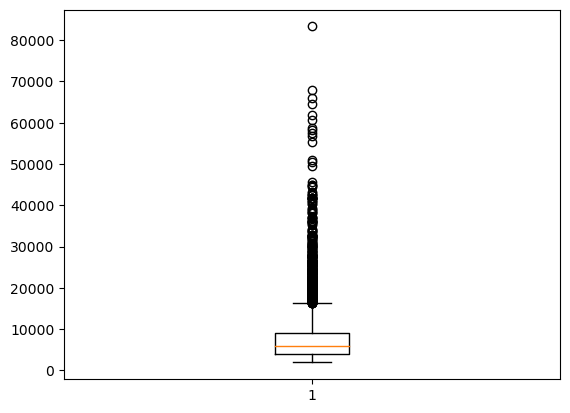

In [3223]:
#Checking for distribution of data
plt.boxplot(X_num['customer lifetime value'])
plt.show()

In [3224]:
X_num['customer lifetime value'].shape

(4543,)

In [3225]:
# Removing outliers from the column.

clv_iqr = np.percentile(X_num['customer lifetime value'],75) - np.percentile(X_num['customer lifetime value'],25)
clv_upper_limit = np.percentile(X_num['customer lifetime value'],75) + 1.5*clv_iqr
clv_lower_limit = np.percentile(X_num['customer lifetime value'],25) - 1.5*clv_iqr

In [3226]:
display("clv_upper_limit: ", clv_upper_limit)
display("clv_lower_limit: ", clv_lower_limit)

'clv_upper_limit: '

16282.857491249997

'clv_lower_limit: '

-3307.1706507499985

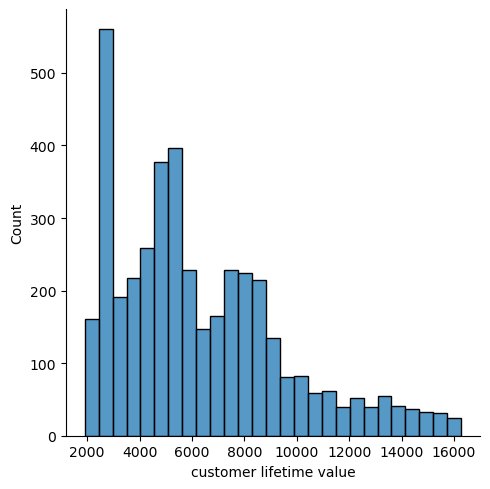

In [3227]:
# Plotting new "free-outliers" data
new_X_num = X_num[(X_num['customer lifetime value']>clv_lower_limit) & (X_num['customer lifetime value']<clv_upper_limit)].copy()
sns.displot(data3['customer lifetime value'])
plt.show()

In [3228]:
#Normalizing the new range values of'Customers Lifetime Value'

In [3229]:
display("New data shape: ", new_X_num.shape)
display("Previous data shape: ", X_num.shape)

'New data shape: '

(4140, 8)

'Previous data shape: '

(4543, 8)

In [3230]:
new_X_num.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,response rate
count,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,6303.422309,37484.413043,91.353623,15.033575,48.115217,0.394928,3.054348,0.142512
std,3219.143058,30352.426939,31.817090,10.114521,28.179815,0.923675,2.470056,0.349617
min,1904.000852,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3803.169464,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,0.000000
50%,5510.333204,34453.500000,81.000000,14.000000,47.000000,0.000000,2.000000,0.000000
75%,8186.960925,61659.250000,108.000000,23.000000,72.000000,0.000000,4.000000,0.000000
max,16272.743220,99961.000000,298.000000,35.000000,99.000000,5.000000,9.000000,1.000000


In [ ]:
#not finished

In [3231]:
"""mca_file_copy=mca_file.copy()
mca_file_copy['customer_lifetime_value']=new_X_num['customer lifetime value']
mca_file_copy['customer_lifetime_value']"""

"mca_file_copy=mca_file.copy()\nmca_file_copy['customer_lifetime_value']=new_X_num['customer lifetime value']\nmca_file_copy['customer_lifetime_value']"

In [3232]:
"""
# Removing null values
mca_file_copy = mca_file_copy.dropna()
null_values3=mca_file_copy.isnull()

print("Checking no remaining Nan Values:")
print()
print(null_values3.sum())
"""

'\n# Removing null values\nmca_file_copy = mca_file_copy.dropna()\nnull_values3=mca_file_copy.isnull()\n\nprint("Checking no remaining Nan Values:")\nprint()\nprint(null_values3.sum())\n'

In [3233]:
"""mca_file_copy['customer_lifetime_value']"""

"mca_file_copy['customer_lifetime_value']"